# Supervised Learning

In [1]:
import librosa
import glob
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import librosa.display
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore") # Ignore All Warnings

### ESC-50

In [2]:
# audio files contains all the audio filepaths.
audio_files = glob.glob('C:/Users/Furkan Atak/Documents/project/audio/*.wav')

In [3]:
# playing a wav file. (dog bark)
ipd.Audio(audio_files[0])

In [4]:
x_exp , sr = librosa.load(audio_files[0] , sr = None)
print(f"sampling rate: {sr}")
print(f"shape of x_exp :{x_exp.shape}") # 44100 * 5 = 220500 sample value

sampling rate: 44100
shape of x_exp :(220500,)


<AxesSubplot:>

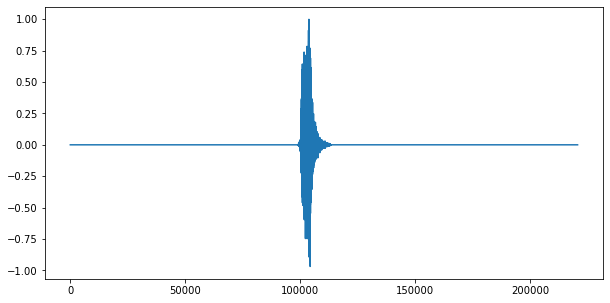

In [5]:
# plotting the example audio file
pd.Series(x_exp).plot(figsize=(10,5))

In [6]:
z_c = librosa.feature.zero_crossing_rate(x_exp) 
np.average(z_c)
np.std(z_c)

0.027503226215854697

In [10]:
# mfcc feautre extraction and plot of the example audio
mfccs = librosa.feature.mfcc(x_exp, sr=sr , n_mfcc = 13)
print(mfccs.shape)

(13, 431)


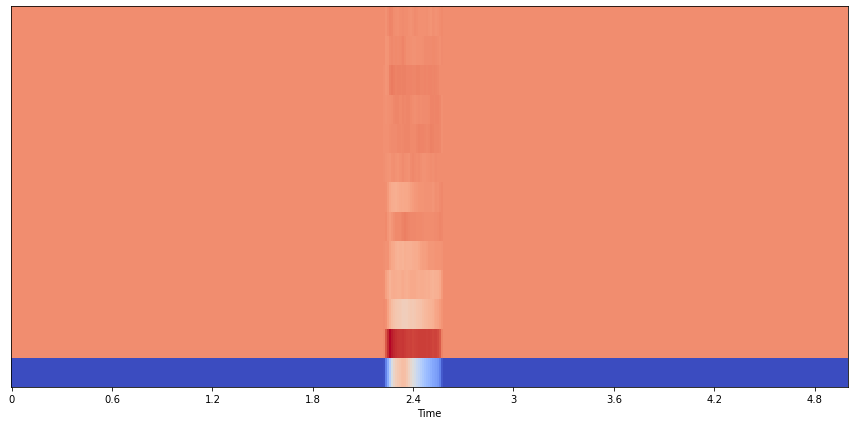

In [8]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [11]:
metadata = pd.read_csv('esc50.csv')
metadata.head() ## same order with audio_files

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [13]:
X_mfcc = np.zeros((2000,24))             ## feature extraction 
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    mfccs = librosa.feature.mfcc(x, sr=sr , n_mfcc = 13)
    mfccs = np.delete(mfccs,0,0)
    mean = np.average(mfccs, axis=1)
    std = np.std(mfccs, axis =1)
    feature = np.concatenate((mean, std))
    X_mfcc[i,:] = feature
X_zc = np.zeros((2000,2))
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    z_c = librosa.feature.zero_crossing_rate(x)
    mean = np.average(z_c)
    std = np.std(z_c)
    feature = [mean , std]
    X_zc[i,:] = feature
X_ft = np.concatenate((X_mfcc, X_zc), axis=1)
X_ft.shape

(2000, 26)

In [14]:
print(f"{X_ft[[0,1],:]}") ## printing 2 rows of the feautre matrix

[[ 8.20712185e+00 -6.65880251e+00 -4.29090643e+00 -3.03447819e+00
   2.59279221e-01 -1.96394646e+00 -2.71576792e-01  5.18284082e-01
   3.41884226e-01  9.06101882e-01 -9.52456146e-03 -1.90549478e-01
   3.06370049e+01  2.67096653e+01  1.58949785e+01  1.28375835e+01
   2.83921146e+00  9.40792370e+00  1.72559893e+00  2.64774203e+00
   2.20294189e+00  4.13594341e+00  1.73183250e+00  1.73261225e+00
   7.32875036e-03  2.75032262e-02]
 [ 8.58396225e+01 -1.07103157e+02  3.10115738e+01 -3.99877357e+01
  -1.72903423e+01 -3.72141037e+01 -1.81456890e+01 -1.17050714e+01
  -1.76214542e+01 -2.68931713e+01 -1.34619141e+01 -9.41718674e+00
   1.79669399e+01  1.14240494e+01  1.37172270e+01  9.44371414e+00
   1.12338228e+01  1.06376228e+01  1.09359570e+01  7.95585346e+00
   8.93421650e+00  1.05581522e+01  7.26902580e+00  6.99319983e+00
   1.57993538e-01  2.27839743e-02]]


In [15]:
y = metadata["target"].values  ## target values
y.shape

(2000,)

In [16]:
knn = KNeighborsClassifier()  ## for esc50 
cvs = cross_val_score(knn, X_ft, y, cv=5)
knn_score = np.average(cvs)
print(f"kNN score : {knn_score}")
clf_svm = svm.SVC()
cvs = cross_val_score(clf_svm, X_ft, y, cv=5)
svm_score = np.average(cvs)
print(f"SVM score: {svm_score}")
clf_rf = RandomForestClassifier()
cvs = cross_val_score(clf_rf, X_ft, y, cv=5)
rf_score = np.average(cvs)
print(f"Random Forest score: {rf_score}")

kNN score : 0.3045
SVM score: 0.33849999999999997
Random Forest score: 0.40800000000000003


### ESC-10

In [17]:
df_10 = metadata.loc[metadata['esc10'] == True]
df_10.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
24,1-116765-A-41.wav,1,41,chainsaw,True,116765,A
54,1-17150-A-12.wav,1,12,crackling_fire,True,17150,A
55,1-172649-A-40.wav,1,40,helicopter,True,172649,A


In [18]:
file_name = df_10['filename'].values

In [19]:
X_mfcc = np.zeros((400,24))
for i in range(len(file_name)):
    x , sr = librosa.load(('C:/Users/Furkan Atak/Documents/project/audio\\'+file_name[i]) , sr=None)
    mfccs = librosa.feature.mfcc(x, sr=sr , n_mfcc = 13)
    mfccs = np.delete(mfccs,0,0)
    mean = np.average(mfccs, axis=1)
    std = np.std(mfccs, axis =1)
    feature = np.concatenate((mean, std))
    X_mfcc[i,:] = feature
X_zc = np.zeros((400,2))
for i in range(len(file_name)):
    x , sr = librosa.load(('C:/Users/Furkan Atak/Documents/project/audio\\'+file_name[i]) , sr=None)
    z_c = librosa.feature.zero_crossing_rate(x)
    mean = np.average(z_c)
    std = np.std(z_c)
    feature = [mean , std]
    X_zc[i,:] = feature
X_ft = np.concatenate((X_mfcc, X_zc), axis=1)
X_ft.shape

(400, 26)

In [20]:
print(f"{X_ft[[0,1],:]}") ## printing 2 rows of the feautre matrix

[[ 8.20712185e+00 -6.65880251e+00 -4.29090643e+00 -3.03447819e+00
   2.59279221e-01 -1.96394646e+00 -2.71576792e-01  5.18284082e-01
   3.41884226e-01  9.06101882e-01 -9.52456146e-03 -1.90549478e-01
   3.06370049e+01  2.67096653e+01  1.58949785e+01  1.28375835e+01
   2.83921146e+00  9.40792370e+00  1.72559893e+00  2.64774203e+00
   2.20294189e+00  4.13594341e+00  1.73183250e+00  1.73261225e+00
   7.32875036e-03  2.75032262e-02]
 [ 1.19020052e+01 -9.87902462e-01 -1.79252899e+00 -2.17740536e+00
   9.69336867e-01  2.88988352e-01 -3.62818569e-01 -3.88736159e-01
   3.14336181e-01  9.60826278e-02  4.81777430e-01  7.55888283e-01
   4.29576950e+01  1.09405088e+01  8.65676689e+00  1.27279110e+01
   3.89153409e+00  3.17135310e+00  3.67605519e+00  3.29238200e+00
   1.57354414e+00  3.12416911e+00  3.55776405e+00  3.36312294e+00
   2.29752755e-03  9.52908712e-03]]


In [21]:
y = df_10["target"].values  ## target values
y.shape

(400,)

In [22]:
knn = KNeighborsClassifier()  ## for esc50 
cvs = cross_val_score(knn, X_ft, y, cv=5)
knn_score = np.average(cvs)
print(f"kNN score : {knn_score}")
clf_svm = svm.SVC()
cvs = cross_val_score(clf_svm, X_ft, y, cv=5)
svm_score = np.average(cvs)
print(f"SVM score: {svm_score}")
clf_rf = RandomForestClassifier()
cvs = cross_val_score(clf_rf, X_ft, y, cv=5)
rf_score = np.average(cvs)
print(f"Random Forest score: {rf_score}")

kNN score : 0.6475
SVM score: 0.675
Random Forest score: 0.7275


## Voice Activity Detection

In [23]:
clips = librosa.effects.split(x_exp, top_db=70)
clips

array([[ 98304, 114176]])

In [24]:
wav_data = []  ## no silence clip
for c in clips:
    data = x_exp[c[0]: c[1]]
    wav_data.extend(data)
wav_data = np.array(wav_data)

In [25]:
print(f"{x_exp.shape}")  ## clip num of total samples
print(f"{wav_data.shape}")

(220500,)
(15872,)


<AxesSubplot:>

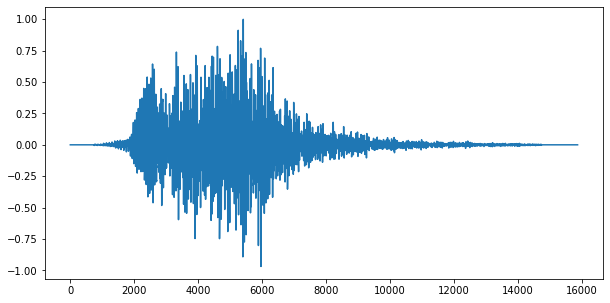

In [26]:
ipd.Audio(wav_data, rate = sr)
pd.Series(wav_data).plot(figsize=(10,5))  ## dog bark

In [27]:
# mfcc feautre extraction and plot of the example audio
mfccs = librosa.feature.mfcc(wav_data, sr=sr , n_mfcc = 13)
print(mfccs.shape)

(13, 32)


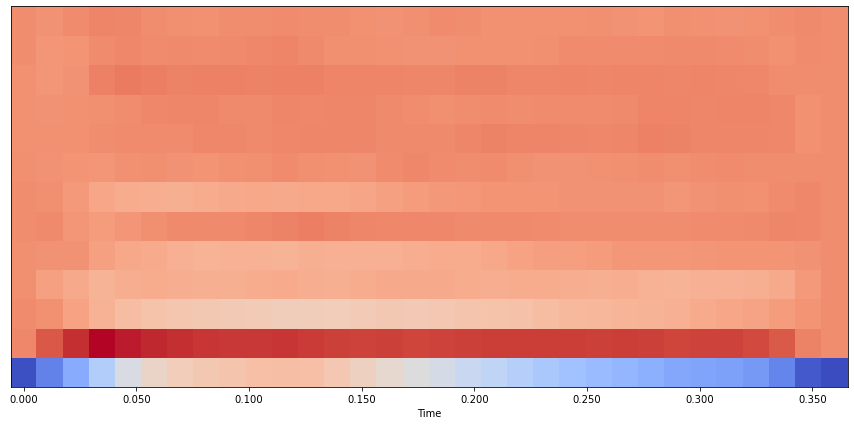

In [28]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [29]:
# audio files contains all the audio filepaths.
audio_files = glob.glob('C:/Users/Furkan Atak/Documents/project/audio/*.wav')

In [30]:
X_mfcc = np.zeros((2000,24))
### loop w/ VAD
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    clips = librosa.effects.split(x, top_db=70)
    wav_data = []  ## no silence clip
    for c in clips:
        data = x[c[0]: c[1]]
        wav_data.extend(data)
    wav_data = np.array(wav_data)
    
    mfccs = librosa.feature.mfcc(wav_data, sr=sr , n_mfcc = 13)
    mfccs = np.delete(mfccs,0,0)
    mean = np.average(mfccs, axis=1)
    std = np.std(mfccs, axis =1)
    feature = np.concatenate((mean, std))
    X_mfcc[i,:] = feature
X_zc = np.zeros((2000,2))
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    clips = librosa.effects.split(x, top_db=70)
    wav_data = []  ## no silence clip
    for c in clips:
        data = x[c[0]: c[1]]
        wav_data.extend(data)
    wav_data = np.array(wav_data)
    
    z_c = librosa.feature.zero_crossing_rate(wav_data)
    mean = np.average(z_c)
    std = np.std(z_c)
    feature = [mean , std]
    X_zc[i,:] = feature
X_ft = np.concatenate((X_mfcc, X_zc), axis=1)
X_ft.shape

(2000, 26)

In [31]:
metadata = pd.read_csv('esc50.csv')
y = metadata["target"].values  ## target values

In [32]:
metadata = pd.read_csv('esc50.csv')
y = metadata["target"].values  ## target values
knn = KNeighborsClassifier()  ## for esc50   ## Scores are better
cvs = cross_val_score(knn, X_ft, y, cv=5)
knn_score = np.average(cvs)
print(f"kNN score : {knn_score}")
clf_svm = svm.SVC()
cvs = cross_val_score(clf_svm, X_ft, y, cv=5)
svm_score = np.average(cvs)
print(f"SVM score: {svm_score}")
clf_rf = RandomForestClassifier()
cvs = cross_val_score(clf_rf, X_ft, y, cv=5)
rf_score = np.average(cvs)
print(f"Random Forest score: {rf_score}")

kNN score : 0.304
SVM score: 0.36300000000000004
Random Forest score: 0.418


## Mel filterbanks

In [33]:
ipd.Audio(audio_files[6])
x_exp , sr = librosa.load(audio_files[6] , sr = None)

# mel spectrogram feautre extraction and plot of the example audio
mel = librosa.feature.melspectrogram(x_exp, sr=sr ,n_mels=16)
print(mel.shape)

(16, 431)


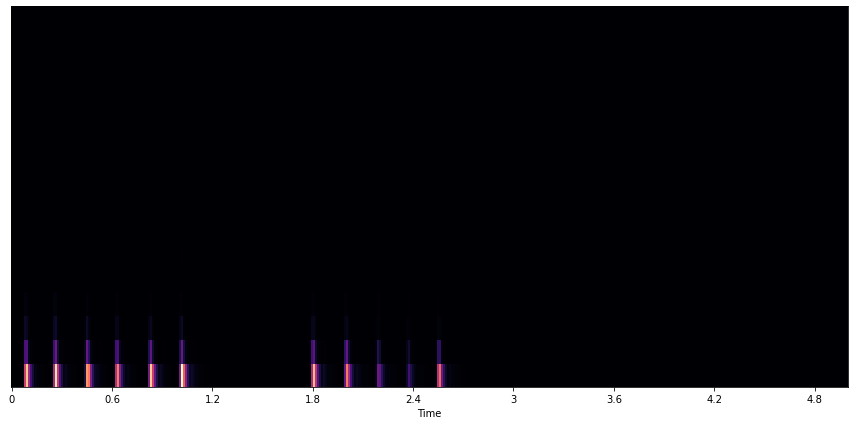

In [34]:
#Displaying  the mel spectrogram:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mel, sr=sr, x_axis='time')
plt.show()

In [36]:
audio_files = glob.glob('../Desktop/audio/*.wav')
X_mel = np.zeros((2000,160))

In [37]:
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    mel = librosa.feature.melspectrogram(x, sr=sr ,n_mels=80)
    mean = np.average(mel, axis=1)
    std = np.std(mel, axis =1)
    feature = np.concatenate((mean, std))
    X_mel[i,:] = feature
X_zc = np.zeros((2000,2))
for i in range(len(audio_files)):
    x , sr = librosa.load(audio_files[i] , sr = None)
    z_c = librosa.feature.zero_crossing_rate(x)
    mean = np.average(z_c)
    std = np.std(z_c)
    feature = [mean , std]
    X_zc[i,:] = feature
X_ft = np.concatenate((X_mfcc, X_zc), axis=1)
X_ft.shape

(2000, 26)

In [38]:
metadata = pd.read_csv('esc50.csv')
y = metadata["target"].values  ## target values
y.shape

(2000,)

In [39]:
knn = KNeighborsClassifier()  ## for esc50   
cvs = cross_val_score(knn, X_ft, y, cv=5)
knn_score = np.average(cvs)
print(f"kNN score : {knn_score}")
clf_svm = svm.SVC()
cvs = cross_val_score(clf_svm, X_ft, y, cv=5)
svm_score = np.average(cvs)
print(f"SVM score: {svm_score}")
clf_rf = RandomForestClassifier()
cvs = cross_val_score(clf_rf, X_ft, y, cv=5)
rf_score = np.average(cvs)
print(f"Random Forest score: {rf_score}")

kNN score : 0.304
SVM score: 0.36350000000000005
Random Forest score: 0.41900000000000004


# Feedword Neural Network

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchaudio.transforms as T
import torchaudio
import os

In [4]:
class ESC_50_Master(Dataset):  ## Custom dataset class definitions 

    def __init__(self, annotations_file, audio_dir,esc_10 = False):
        self.annotations = pd.read_csv(annotations_file)
        
        if esc_10 == True :  
            self.annotations = self.annotations.loc[self.annotations['esc10'] == True]

        self.audio_dir = audio_dir
        self.esc_10 = esc_10
        
    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        self.annotations.loc[self.annotations['esc10'] == True]
        audio_sample_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        signal, sr = librosa.load(audio_sample_path, sr = None)  # signal retrieval
        
        X_mfcc = np.zeros((1,24))
        mfccs = librosa.feature.mfcc(signal, sr=sr , n_mfcc = 13) # feautre exctraction
        mfccs = np.delete(mfccs,0,0)
        mean = np.average(mfccs, axis=1)
        std = np.std(mfccs, axis =1)
        mfcc = np.concatenate((mean, std))
        X_mfcc[0,:] = mfcc
#         X_mel = np.zeros((1,160))
#         mel = librosa.feature.melspectrogram(signal, sr=sr ,n_mels=80)
#         mean = np.average(mel, axis=1)
#         std = np.std(mel, axis =1)
#         feature = np.concatenate((mean, std))
#         X_mel[0,:] = feature
        
        X_zc = np.zeros((1,2))
        z_c = librosa.feature.zero_crossing_rate(signal)
        X_zc[0,:] = [np.average(z_c), np.std(z_c)]
        
        feature = np.concatenate((X_mfcc , X_zc), axis = 1)
        
        return torch.from_numpy(feature), label

    def _get_audio_sample_path(self, index):
        path = os.path.join(self.audio_dir, self.annotations.iloc[
            index, 1])
        return path

    def _get_audio_sample_label(self, index):
        return self.annotations.iloc[index, 3]

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()  
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [6]:
def create_data_loader(train_data, batch_size):
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    return train_dataloader

In [7]:
def train_single_epoch(model, data_loader, loss_fn, optimiser, device):
    for input, target in data_loader:
        input, target = input.to(device), target.to(device)

        # calculate loss
        prediction = model(input.float())
        loss = loss_fn(torch.squeeze(prediction), target)

        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    print(f"loss: {loss.item()}")


def train(model, data_loader, loss_fn, optimiser, device, epochs , test_dataloader):
    top_accuracy = 0
    for i in range(epochs):
        print(f"Epoch {i+1}")
        train_single_epoch(model, data_loader, loss_fn, optimiser, device)
        correct = 0
        total = 0
        for input, labels in test_dataloader:
            outputs = net(input.float())
            _, predicted = torch.max(torch.squeeze(outputs).data, 1)  # Choose the best class from the output: The class with the best score
            total += labels.size(0)                    # Increment the total count
            correct += (predicted == labels).sum()     # Increment the correct count
    
        print('Accuracy %d %%' % (100 * correct / total))
        print("---------------------------")
        if (100 * correct / total) > top_accuracy:
            top_accuracy = (100 * correct / total)
    print("Finished training")
    return top_accuracy

In [8]:
if __name__ == "__main__":
    

    device = "cpu"

    
    
    TEST_FILE_1 = "C:/Users/Furkan Atak/Documents/project/test_1.csv"
    TRAIN_FILE_1 = "C:/Users/Furkan Atak/Documents/project/train_1.csv"
    TEST_FILE_2 = "C:/Users/Furkan Atak/Documents/project/test_2.csv"
    TRAIN_FILE_2 = "C:/Users/Furkan Atak/Documents/project/train_2.csv"
    TEST_FILE_3 = "C:/Users/Furkan Atak/Documents/project/test_3.csv"
    TRAIN_FILE_3 = "C:/Users/Furkan Atak/Documents/project/train_3.csv"
    TEST_FILE_4 = "C:/Users/Furkan Atak/Documents/project/test_4.csv"
    TRAIN_FILE_4 = "C:/Users/Furkan Atak/Documents/project/train_4.csv"
    TEST_FILE_5 = "C:/Users/Furkan Atak/Documents/project/test_5.csv"
    TRAIN_FILE_5 = "C:/Users/Furkan Atak/Documents/project/train_5.csv"
    
    AUDIO_DIR = "C:/Users/Furkan Atak/Documents/project/audio"
    SAMPLE_RATE = 44100
    
    BATCH_SIZE = 100
    EPOCHS = 10
    LEARNING_RATE = 0.001
    

    train_1 = ESC_50_Master(TRAIN_FILE_1, AUDIO_DIR)
    test_1 = ESC_50_Master(TEST_FILE_1, AUDIO_DIR)
    train_2 = ESC_50_Master(TRAIN_FILE_2, AUDIO_DIR)
    test_2 = ESC_50_Master(TEST_FILE_2, AUDIO_DIR)
    train_3 = ESC_50_Master(TRAIN_FILE_3, AUDIO_DIR)
    test_3 = ESC_50_Master(TEST_FILE_3, AUDIO_DIR)
    train_4 = ESC_50_Master(TRAIN_FILE_4, AUDIO_DIR)
    test_4 = ESC_50_Master(TEST_FILE_4, AUDIO_DIR)
    train_5 = ESC_50_Master(TRAIN_FILE_5, AUDIO_DIR)
    test_5 = ESC_50_Master(TEST_FILE_5, AUDIO_DIR)
    
    train_dataloader_1 = create_data_loader(train_1, BATCH_SIZE)  ## data loader 
    test_dataloader_1 = create_data_loader(test_1, BATCH_SIZE)
    train_dataloader_2 = create_data_loader(train_2, BATCH_SIZE)  ## data loader 
    test_dataloader_2 = create_data_loader(test_2, BATCH_SIZE)
    train_dataloader_3 = create_data_loader(train_3, BATCH_SIZE)  ## data loader 
    test_dataloader_3 = create_data_loader(test_3, BATCH_SIZE)
    train_dataloader_4 = create_data_loader(train_4, BATCH_SIZE)  ## data loader 
    test_dataloader_4 = create_data_loader(test_4, BATCH_SIZE)
    train_dataloader_5 = create_data_loader(train_5, BATCH_SIZE)  ## data loader 
    test_dataloader_5 = create_data_loader(test_5, BATCH_SIZE)
    
    net = Net(input_size = 26, hidden_size = 100, num_classes = 50)
    print(net)
    
    ## 
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    
    accuracy_1 = train(net, train_dataloader_1, loss_fn, optimiser, device, EPOCHS, test_dataloader_1)
    net = Net(input_size = 26, hidden_size = 100, num_classes = 50)
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    accuracy_2 = train(net, train_dataloader_2, loss_fn, optimiser, device, EPOCHS, test_dataloader_2)
    net = Net(input_size = 26, hidden_size = 100, num_classes = 50)
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    accuracy_3 = train(net, train_dataloader_3, loss_fn, optimiser, device, EPOCHS, test_dataloader_3)
    net = Net(input_size = 26, hidden_size = 100, num_classes = 50)
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    accuracy_4 = train(net, train_dataloader_4, loss_fn, optimiser, device, EPOCHS, test_dataloader_4)
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    net = Net(input_size = 26, hidden_size = 100, num_classes = 50)
    optimiser = torch.optim.Adam(net.parameters(),
                                 lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    accuracy_5 = train(net, train_dataloader_5, loss_fn, optimiser, device, EPOCHS, test_dataloader_5)

Net(
  (fc1): Linear(in_features=26, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1
loss: 4.120473861694336
Accuracy 8 %
---------------------------
Epoch 2
loss: 3.4378445148468018
Accuracy 17 %
---------------------------
Epoch 3
loss: 2.968580722808838
Accuracy 21 %
---------------------------
Epoch 4
loss: 2.6850500106811523
Accuracy 24 %
---------------------------
Epoch 5
loss: 2.4666264057159424
Accuracy 24 %
---------------------------
Epoch 6
loss: 2.3412601947784424
Accuracy 27 %
---------------------------
Epoch 7
loss: 2.2201828956604004
Accuracy 27 %
---------------------------
Epoch 8
loss: 2.1157784461975098
Accuracy 29 %
---------------------------
Epoch 9
loss: 2.0352869033813477
Accuracy 29 %
---------------------------
Epoch 10
loss: 1.9673874378204346
Accuracy 31 %
---------------------------
F

In [9]:
(accuracy_1 + accuracy_2 + accuracy_3 + accuracy_4 + accuracy_5) / 5 

tensor(33.3000)